In [34]:
import mediapipe as mp
import cv2
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from inference.infer import PoseDetector 

In [35]:
pose_params = {
        'STATIC_IMAGE_MODE': False, #False: 감지 편하도록 video stream 임의로 조정 / True video stream 조정하지 않음 
        'MODEL_COMPLEXITY': 1, #포즈 랜드마크 모델의 복잡성: 0, 1 또는 2. 랜드마크 정확도와 추론 지연은 일반적으로 모델 복잡성에 따라 올라갑니다.
        'SMOOTH_LANDMARKS': True, #True시 솔루션 필터가 여러 입력 이미지에 랜드마크를 표시하여 지터를 줄임. static_image_mode을 true로 설정하면 무시
        'ENABLE_SEGMENTATION': False, #Not used
        'SMOOTH_SEGMENTATION': True, #Not used
        'MIN_DETECTION_CONFIDENCE': 0.5, #탐지에 성공한 것으로 간주되는 사람 탐지 모델의 최소 신뢰 값([0.0, 1.0])입니다. 기본값은 0.5입니다.
        'MIN_TRACKING_CONFIDENCE': 0.5 #포즈 랜드마크가 성공적으로 추적된 것으로 간주될 랜드마크 추적 모델의 최소 신뢰도 값, 그렇지 않으면 다음 입력 이미지에서 사람 감지가 자동으로 호출됩니다. 더 높은 값으로 설정하면 더 긴 대기 시간을 희생하면서 솔루션의 견고성을 높일 수 있습니다.
    }
landmarks = ['nose',
        'left_eye_inner', 'left_eye', 'left_eye_outer',
        'right_eye_inner', 'right_eye', 'right_eye_outer',
        'left_ear', 'right_ear',
        'mouth_left', 'mouth_right',
        'left_shoulder', 'right_shoulder',
        'left_elbow', 'right_elbow',
        'left_wrist', 'right_wrist',
        'left_pinky', 'right_pinky',
        'left_index', 'right_index',
        'left_thumb', 'right_thumb',
        'left_hip', 'right_hip',
        'left_knee', 'right_knee',
        'left_ankle', 'right_ankle',
        'left_heel', 'right_heel',
        'left_foot_index', 'right_foot_index']
dir_ = '../data_folder/outputs/mac.mp4'

In [35]:
pose = PoseDetector(pose_params, landmarks=landmarks)

In [13]:
o = {'a': {'v':1, 'l':2}}

In [21]:
o empty

SyntaxError: invalid syntax (199530116.py, line 1)

In [36]:
with open('../data_folder/labels/jsons/follow.json') as f:
    axis_address = json.load(f)

In [37]:
axis_address

{'nose': [-0.18120615, -0.42284527, -0.3212373],
 'left_eye_inner': [-0.20158245, -0.45186722, -0.32337365],
 'left_eye': [-0.20143639, -0.45224184, -0.32301012],
 'left_eye_outer': [-0.20182854, -0.45262006, -0.3226029],
 'right_eye_inner': [-0.22160229, -0.43323869, -0.32100832],
 'right_eye': [-0.22137338, -0.43432817, -0.32180583],
 'right_eye_outer': [-0.22221243, -0.43553621, -0.32071933],
 'left_ear': [-0.16836455, -0.50872588, -0.25056472],
 'right_ear': [-0.26597714, -0.4394486, -0.25136214],
 'mouth_left': [-0.15005764, -0.43802008, -0.28717858],
 'mouth_right': [-0.17879498, -0.4163059, -0.28634879],
 'left_shoulder': [0.00237183, -0.49230292, -0.14699444],
 'right_shoulder': [-0.22734752, -0.3584305, -0.20037796],
 'left_elbow': [0.11783615, -0.3058925, -0.10438602],
 'right_elbow': [-0.02843332, -0.20251946, -0.1835804],
 'left_wrist': [0.23383386, -0.12885755, -0.15331951],
 'right_wrist': [0.15480599, -0.13014694, -0.23703107],
 'left_pinky': [0.26422307, -0.08245346, -0

In [38]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

In [39]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose
with mp_pose.Pose(
    static_image_mode=False,
    model_complexity=1,
    enable_segmentation=False,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as pose:
    r_idx = np.random.randint(0, 500)
    dir_ = '../data_folder/bufs/' + str(407) + '.jpg'
    result = []
    for i in range(0, 514):
        dir_ = '../data_folder/bufs/' + str(i) + '.jpg'
        r_img = cv2.cvtColor(cv2.imread(dir_), cv2.COLOR_BGR2RGB)
        res = pose.process(r_img)
        structure = {}
        for idx, landmark in enumerate(landmarks):
            structure[landmark] = [res.pose_world_landmarks.landmark[idx].x,
                                  res.pose_world_landmarks.landmark[idx].y,
                                  res.pose_world_landmarks.landmark[idx].z]
        res = []
        for landmark in landmarks:
            st_np = np.array(structure[landmark])
            ax_np = np.array(axis_address[landmark])
            cal = (st_np @ ax_np) / (np.linalg.norm(st_np, 2) * np.linalg.norm(ax_np, 2))
            res.append(cal)
        result.append(np.mean(np.array(res)))


In [40]:
result

[0.8338027899909031,
 0.8321976489910916,
 0.8314341652257934,
 0.8362663664964385,
 0.8390972499765144,
 0.8401292080092037,
 0.8304298706605868,
 0.8340586043409656,
 0.8365974210450889,
 0.8385616730176091,
 0.8485200520067337,
 0.8519351304946841,
 0.858786832510231,
 0.8583001272113572,
 0.8589894576770293,
 0.8601384804777469,
 0.865117227167904,
 0.8644016165597586,
 0.865033741623418,
 0.8660197152527529,
 0.8632736395804818,
 0.8620092651443994,
 0.8589735208615901,
 0.868599541388196,
 0.8677701947335311,
 0.8686847119740803,
 0.8713251865540275,
 0.8703634951903834,
 0.8656241056195134,
 0.8654006452289035,
 0.8575670822003192,
 0.85589868943604,
 0.8571164937500058,
 0.8628282733403697,
 0.8594046919134034,
 0.8533011010497746,
 0.8475939577467566,
 0.8441359487763297,
 0.832475252370816,
 0.8333034487974907,
 0.8329762391363341,
 0.8306238170985373,
 0.8308257512727959,
 0.8468424016463398,
 0.8611137346534976,
 0.8724792764457074,
 0.878699763816466,
 0.8794982302499176,


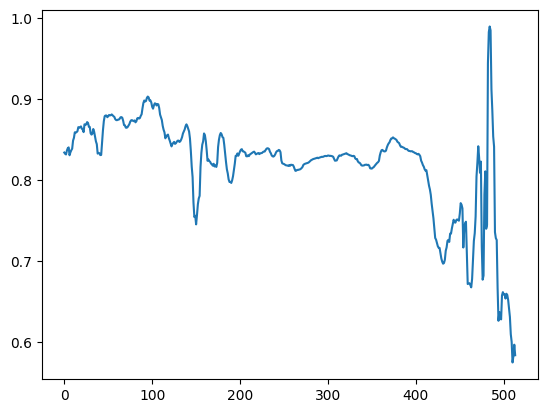

In [41]:
plt.plot(result)

In [42]:
np.argmax(result)

484

In [43]:
with mp_pose.Pose(
    static_image_mode=False,
    model_complexity=1,
    enable_segmentation=False,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as pose:
    dir_ = '../data_folder/bufs/' + str(np.argmax(result)) + '.jpg'
    r_im = cv2.cvtColor(cv2.imread(dir_), cv2.COLOR_BGR2RGB)
    r_im.flags.writeable = True
    res = pose.process(r_im)
    mp_drawing.draw_landmarks(
            r_im,
            res.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())

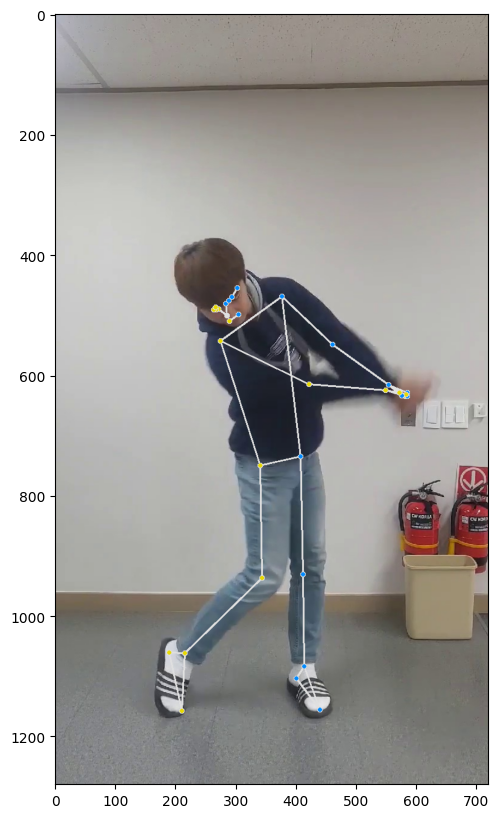

In [44]:
plt.figure(figsize=(15, 10))
plt.imshow(r_im)